## **Finanças e Macroeconomia**

### **Índices Inflacionários (IPCA, IGPM, INCC)**

Problema real: Ajustar o orçamento de um projeto de construção civil para refletir a inflação futura usando INCC.

Solução aplicada: Utilizar dados históricos do INCC para projetar a inflação esperada com uma média móvel de 12 meses.

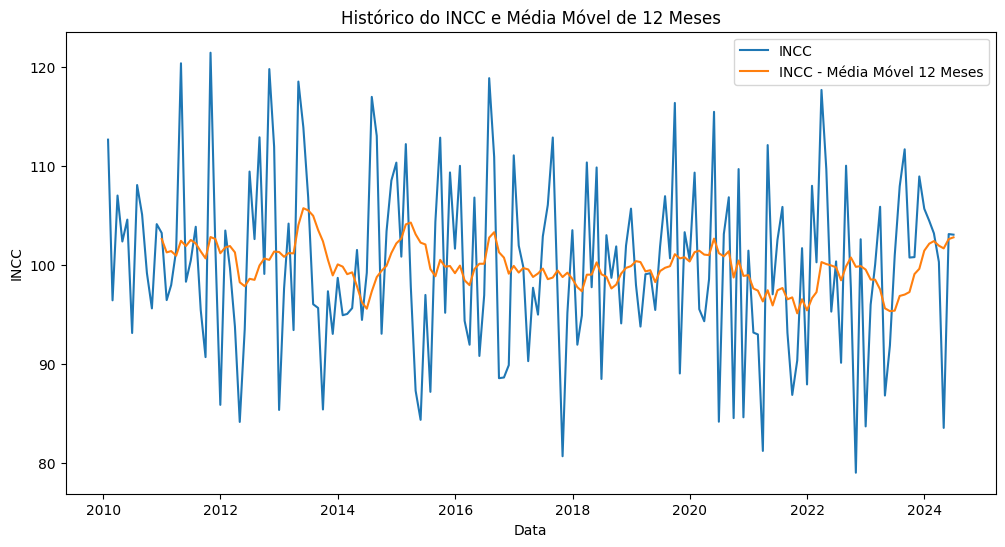

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gerar dados fictícios de INCC
date_range = pd.date_range(start='2010-01-01', end='2024-06-30', freq='ME')
incc_values = np.random.normal(loc=100, scale=10, size=len(date_range))
incc_data = pd.DataFrame(data=incc_values, index=date_range, columns=['INCC'])

# Calcular média móvel de 12 meses
incc_data['INCC_Media_Movel'] = incc_data['INCC'].rolling(window=12).mean()

# Plotar os dados
plt.figure(figsize=(12, 6))
plt.plot(incc_data['INCC'], label='INCC')
plt.plot(incc_data['INCC_Media_Movel'], label='INCC - Média Móvel 12 Meses')
plt.xlabel('Data')
plt.ylabel('INCC')
plt.title('Histórico do INCC e Média Móvel de 12 Meses')
plt.legend()
plt.show()


### **Produto Interno Bruto (PIB)**

Problema real: Um investidor está considerando entrar no mercado brasileiro e quer entender o desempenho econômico do país nos últimos anos.

Solução aplicada: Analisar os dados históricos do PIB em dólares para avaliar o crescimento econômico e identificar tendências. O código carrega e plota dados históricos do PIB do Brasil em USD.

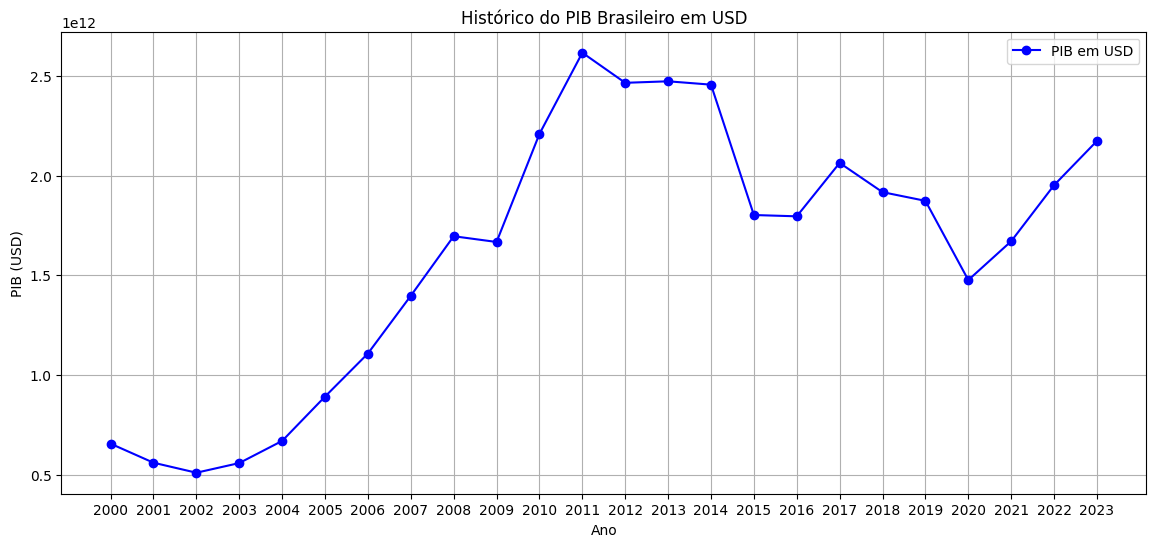

In [2]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import warnings

# Parâmetros para buscar o PIB do Brasil em dólares
indicator = 'NY.GDP.MKTP.CD'
country = 'BR'

warnings.filterwarnings("ignore", message="errors='ignore' is deprecated")

# Carregando os dados pelo Banco Mundial
pib_data = wb.download(indicator=indicator, country=country, start='2000', end='2024')

# Resetar o índice para usar a data como uma coluna
pib_data.reset_index(inplace=True)

# Ordenar os dados pelo ano em ordem crescente
pib_data.sort_values(by='year', inplace=True)

# Plotar os dados do PIB
plt.figure(figsize=(14, 6))
plt.plot(pib_data['year'], pib_data[indicator], marker='o', linestyle='-', color='b', label='PIB em USD')
plt.xlabel('Ano')
plt.ylabel('PIB (USD)')
plt.title('Histórico do PIB Brasileiro em USD')
plt.legend()
plt.grid(True)
plt.show()


### **Índices de Confiança**

Problema real: Uma rede de varejo deseja prever as vendas futuras e está interessada em entender o comportamento do consumidor.

Solução aplicada: Usar os índices de confiança do consumidor para prever as tendências de compra. Ao correlacionar os índices de confiança com os dados de vendas, a empresa pode ajustar suas estratégias de marketing e estoque.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Gerar dados fictícios de vendas
date_range = pd.date_range(start='2010-01-01', end='2024-06-30', freq='ME')
vendas_values = np.random.normal(loc=150, scale=20, size=len(date_range))
vendas_data = pd.DataFrame(data=vendas_values, index=date_range, columns=['Vendas'])
# Obter dados de índice de confiança
indice_data = yf.download('PETR4.SA', start='2010-01-01', end='2024-06-30', interval='1mo')['Close']
indice_data = indice_data.rename('Índice')

# Ajustar as datas do índice de confiança para o final do mês
indice_data.index = indice_data.index + pd.offsets.MonthEnd(0)

indice_data.to_frame()

[*********************100%%**********************]  1 of 1 completed


,Índice
Date,
2010-01-31,34.169998
2010-02-28,34.610001
2010-03-31,35.389999
2010-04-30,32.799999
2010-05-31,29.600000
...,...
2024-02-29,40.139999
2024-03-31,37.360001
2024-04-30,42.020000


In [4]:
# Normalizar os dados
vendas_data['Vendas'] = (vendas_data['Vendas'] - vendas_data['Vendas'].min()) / (vendas_data['Vendas'].max() - vendas_data['Vendas'].min())
indice_data = (indice_data - indice_data.min()) / (indice_data.max() - indice_data.min())

indice_data = pd.DataFrame(indice_data)

In [5]:
# Verificar os índices antes do alinhamento
print("Índices de vendas_data:")
print()
print(vendas_data.index)
print()
print("Índices de indice_data:")
print()
print(indice_data.index)

Índices de vendas_data:

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30'],
              dtype='datetime64[ns]', length=174, freq='ME')

Índices de indice_data:

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30'],
              dtype='datetime64[ns]', name='Date', length=174, freq=None)


In [6]:
# Garantir que os índices estão alinhados
aligned_data = pd.concat([vendas_data, indice_data], axis=1).dropna()

In [7]:
aligned_data

,Vendas,Índice
2010-01-31,0.445382,0.788865
2010-02-28,0.455373,0.800699
2010-03-31,0.631508,0.821678
2010-04-30,0.481683,0.752017
2010-05-31,0.425402,0.665949
...,...,...
2024-02-29,0.632252,0.949435
2024-03-31,0.385005,0.874664
2024-04-30,0.621103,1.000000
2024-05-31,0.655778,0.913125


In [8]:
(aligned_data.describe())

,Vendas,Índice
count,174.000000,174.000000
mean,0.495044,0.465984
std,0.180676,0.212949
min,0.000000,0.000000
25%,0.383226,0.315559
50%,0.495717,0.464900
75%,0.630287,0.603819
max,1.000000,1.000000


In [9]:
# Calcular correlação
correlacao = aligned_data['Vendas'].corr(aligned_data['Índice'])

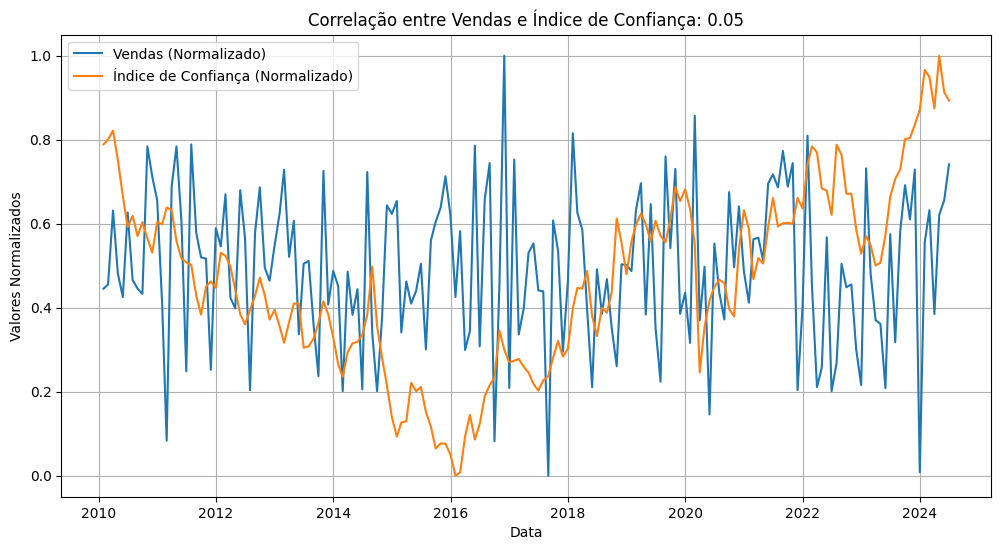

In [10]:
# Plotar os dados
plt.figure(figsize=(12, 6))
plt.plot(aligned_data['Vendas'], label='Vendas (Normalizado)')
plt.plot(aligned_data['Índice'], label='Índice de Confiança (Normalizado)')
plt.xlabel('Data')
plt.ylabel('Valores Normalizados')
plt.title(f'Correlação entre Vendas e Índice de Confiança: {correlacao:.2f}')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### **Taxa de Câmbio (Dólar/Real)**

Problema real: Uma empresa exportadora precisa gerenciar o risco cambial devido à volatilidade do dólar.

Solução aplicada: Utilizar análises de séries temporais para prever a taxa de câmbio e implementar estratégias de hedge para proteger contra flutuações adversas do dólar.

[*********************100%%**********************]  1 of 1 completed


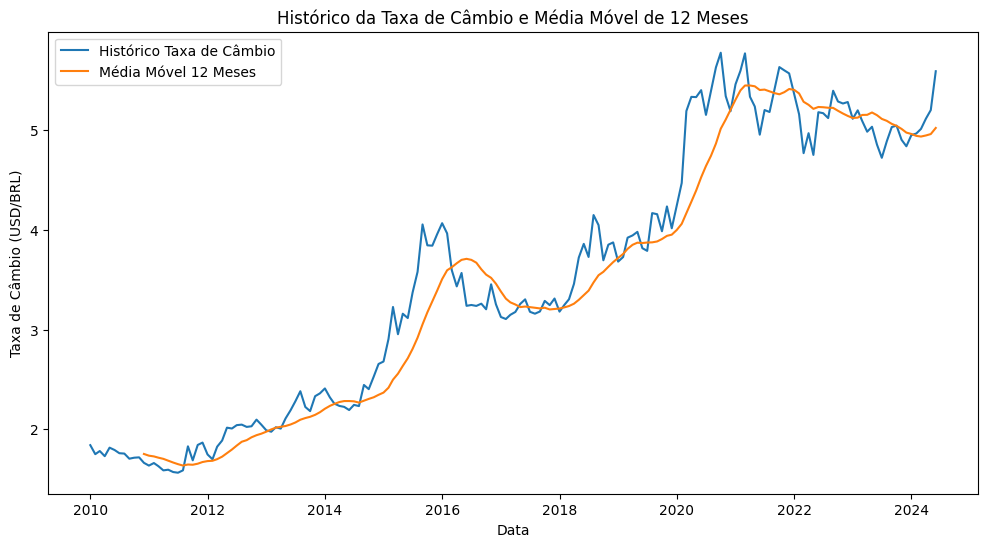

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Obter dados de taxa de câmbio USD/BRL
cambio_data = yf.download('BRL=X', start='2010-01-01', end='2024-06-30', interval='1mo')['Close']

# Calcular média móvel de 12 meses
cambio_data_mm = cambio_data.rolling(window=12).mean()

# Plotar os dados
plt.figure(figsize=(12, 6))
plt.plot(cambio_data, label='Histórico Taxa de Câmbio')
plt.plot(cambio_data_mm, label='Média Móvel 12 Meses')
plt.xlabel('Data')
plt.ylabel('Taxa de Câmbio (USD/BRL)')
plt.title('Histórico da Taxa de Câmbio e Média Móvel de 12 Meses')
plt.legend()
plt.show()


### **Correlações entre Indicadores Macroeconômicos**

Problema real: Um analista financeiro quer entender como diferentes indicadores macroeconômicos estão relacionados para prever movimentos de mercado.

Solução aplicada: Construir uma matriz de correlação e usar um heatmap para visualizar as relações entre os indicadores SELIC, PIB, IPCA, INCC e Dólar.

[*********************100%%**********************]  3 of 3 completed


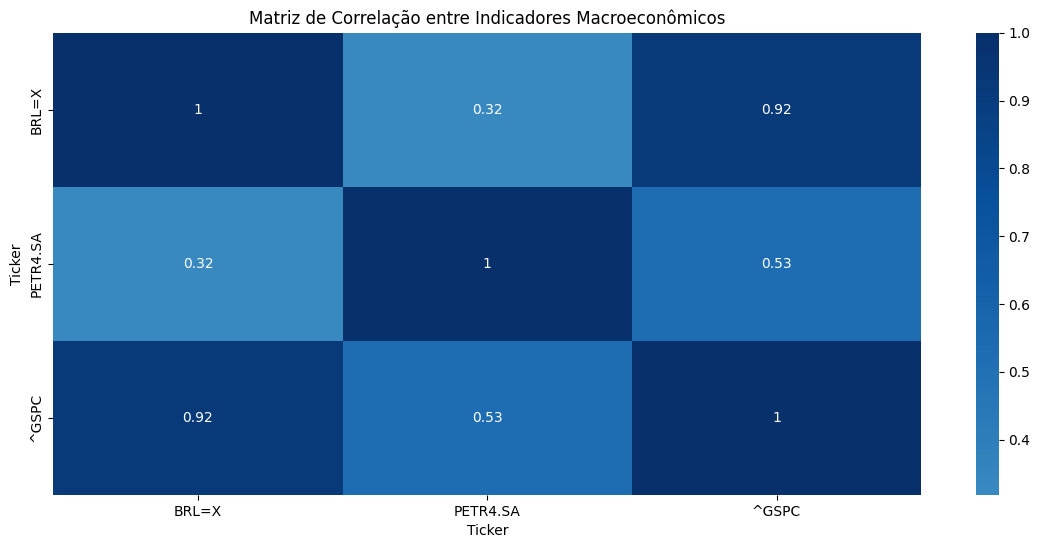

In [12]:
import seaborn as sns
import yfinance as yf

# Obter dados de diferentes indicadores macroeconômicos (substitua pelos símbolos relevantes)
indicadores = ['^GSPC', 'PETR4.SA', 'BRL=X']
indicadores_data = yf.download(indicadores, start='2010-01-01', end='2024-06-30', interval='1mo')['Close']

# Calcular correlação
correlacao = indicadores_data.corr()

# Plotar heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(correlacao, annot=True, cmap='Blues', center=0)
plt.title('Matriz de Correlação entre Indicadores Macroeconômicos')
plt.show()


### **Extração de Dados da API do Banco Central**

Problema real: Um economista precisa obter dados atualizados e detalhados sobre a carteira de crédito para uma análise econômica.

Solução aplicada: Inicialmente, utilizar a API do Banco Central para extrair os dados necessários e realizar uma análise básica no gráfico gerado para a série temporal da carteira de crédito, verificando a evolução dos valores ao longo do tempo. Posteriormente, usar métodos mais avançados, que darão ainda mais assertividade a esta análise.

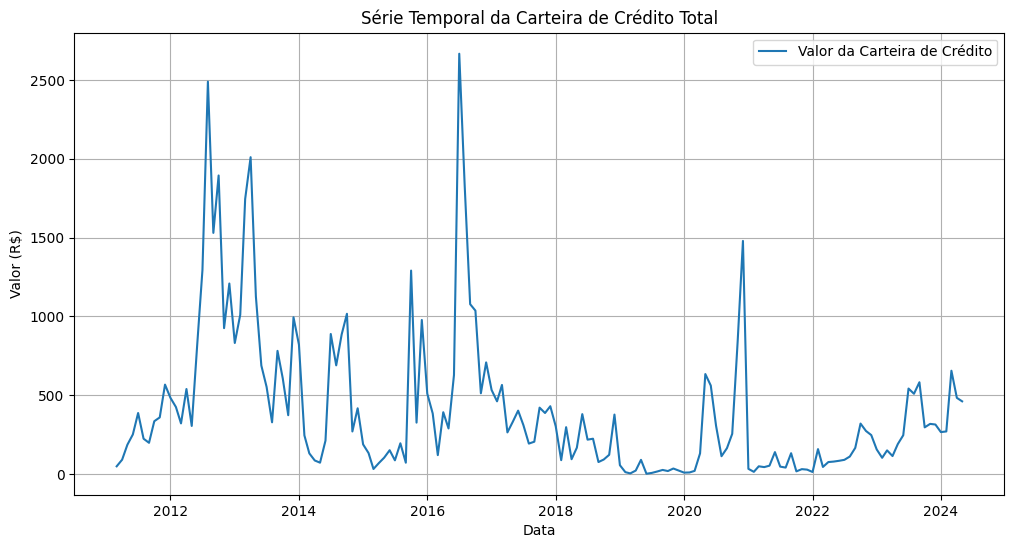

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Definir a URL da API e os parâmetros
url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.20693/dados'
params = {'formato': 'json'}

# Fazer a solicitação GET
response = requests.get(url, params=params)

# Verificar se a solicitação foi bem-sucedida
if response.status_code == 200:
    try:
        dados = response.json()
        df = pd.DataFrame(dados)
        df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
        df.set_index('data', inplace=True)
        df['valor'] = df['valor'].astype(float)
        
        # Plotar os dados
        plt.figure(figsize=(12, 6))
        plt.plot(df['valor'], label='Valor da Carteira de Crédito')
        plt.xlabel('Data')
        plt.ylabel('Valor (R$)')
        plt.title('Série Temporal da Carteira de Crédito Total')
        plt.legend()
        plt.grid(True)
        plt.show()
    except ValueError as e:
        print(f"Erro ao decodificar JSON: {e}")
        print("Conteúdo da resposta:", response.text)
else:
    print('Erro na solicitação:', response.status_code)


### **Combinando Ativos com Macroeconomia**

Problema real: Um gestor de investimentos quer otimizar uma carteira combinando ativos de acordo com o cenário macroeconômico atual.

Solução aplicada: Utilizar indicadores macroeconômicos para ajustar a alocação de ativos em uma carteira de investimentos, maximizando o retorno esperado para um determinado nível de risco.

In [14]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrames para armazenar os dados
selic = pd.DataFrame()
ipca = pd.DataFrame()
dolar = pd.DataFrame()

# Obter dados de indicadores macroeconômicos do Yahoo Finance
selic_data = yf.download('^IRX', start='2014-12-31', end='2022-12-31')
ipca_data = yf.download('^BVSP', start='2014-12-31', end='2022-12-31')  # Usando IBOVESPA como proxy
dolar_data = yf.download('BRL=X', start='2014-12-31', end='2022-12-31')

# Verificar se os dados foram baixados corretamente
selic_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,0.022,0.037,0.010,0.037,0.037,0
2015-01-02,0.030,0.030,0.015,0.015,0.015,0
2015-01-05,0.008,0.018,0.003,0.003,0.003,0
2015-01-06,0.023,0.023,0.018,0.020,0.020,0
2015-01-07,0.023,0.025,0.020,0.020,0.020,0


In [15]:
ipca_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,48512.0,2882100
2015-01-05,48512.0,48512.0,47264.0,47517.0,47517.0,3866100
2015-01-06,47517.0,48061.0,47338.0,48001.0,48001.0,4559300
2015-01-07,48006.0,49882.0,48006.0,49463.0,49463.0,4408800
2015-01-08,49463.0,50261.0,49017.0,49943.0,49943.0,3621900


In [16]:
dolar_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,2.6541,2.6545,2.6374,2.6541,2.6541,0
2015-01-01,2.6525,2.6525,2.6525,2.6542,2.6542,0
2015-01-02,2.6614,2.7041,2.6525,2.6532,2.6532,0
2015-01-05,2.6779,2.7149,2.6779,2.6912,2.6912,0
2015-01-06,2.7034,2.7187,2.6888,2.7031,2.7031,0


In [17]:
# Preencher DataFrames com os dados
selic['SELIC'] = selic_data['Close']
ipca['IPCA'] = ipca_data['Close']
dolar['DOLAR'] = dolar_data['Close']

# Concatenar os dados em um único DataFrame
macros = pd.concat([selic, ipca, dolar], axis=1)
macros.columns = ['SELIC', 'IPCA', 'DOLAR']

# Preencher dados faltantes com o método forward fill
macros.ffill(inplace=True)

# Verificar os dados antes da normalização
macros

,SELIC,IPCA,DOLAR
Date,,,
2014-12-31,0.037,NaN,2.6541
2015-01-01,0.037,NaN,2.6542
2015-01-02,0.015,48512.0,2.6532
2015-01-05,0.003,47517.0,2.6912
2015-01-06,0.020,48001.0,2.7031
...,...,...,...
2022-12-26,4.193,108738.0,5.1643
2022-12-27,4.195,108347.0,5.2175
2022-12-28,4.338,110237.0,5.2923


In [18]:
# Normalizar os dados para visualização
macros_adjusted = (macros - macros.min()) / (macros.max() - macros.min())

# Estatísticas descritivas após a normalização
macros_adjusted

,SELIC,IPCA,DOLAR
Date,,,
2014-12-31,0.031960,NaN,0.025564
2015-01-01,0.031960,NaN,0.025595
2015-01-02,0.027009,0.118087,0.025293
2015-01-05,0.024308,0.107420,0.036749
2015-01-06,0.028134,0.112608,0.040336
...,...,...,...
2022-12-26,0.967364,0.763741,0.782310
2022-12-27,0.967815,0.759549,0.798348
2022-12-28,1.000000,0.779811,0.820898


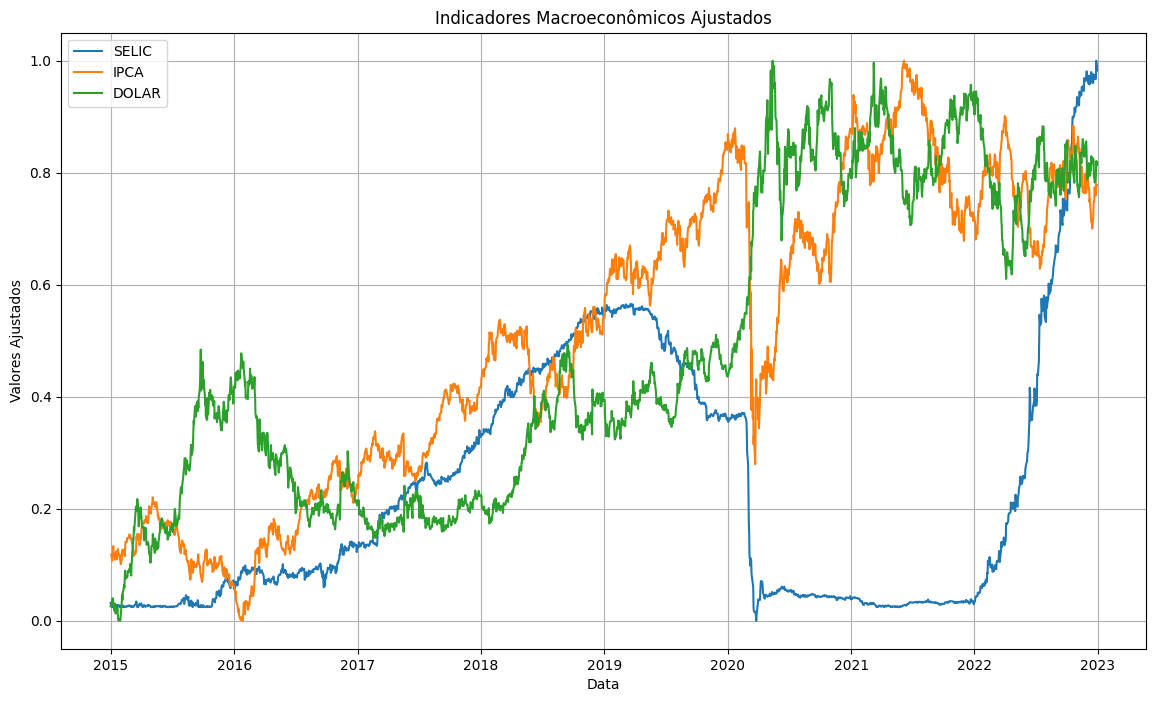

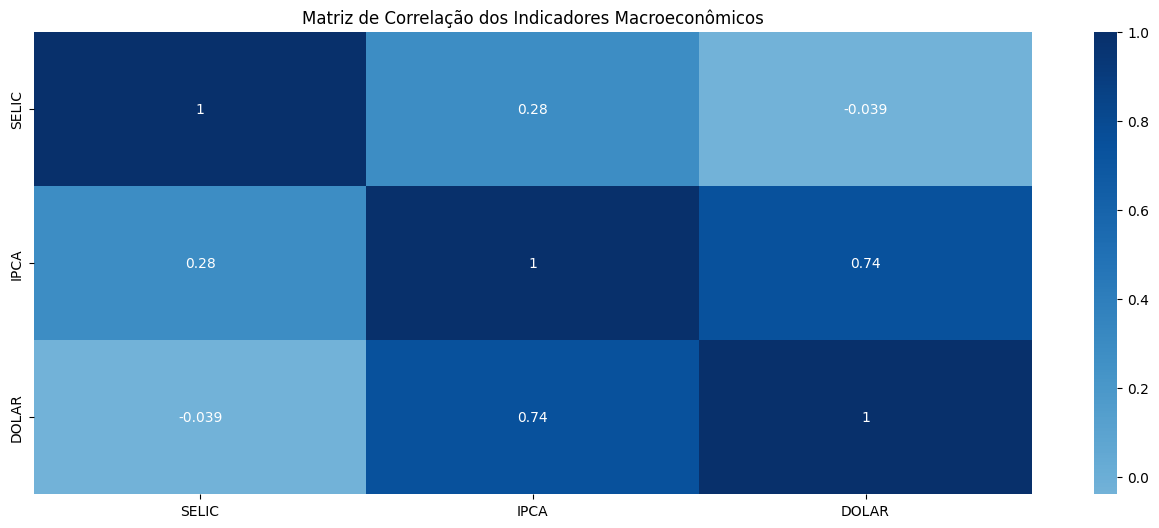

In [19]:
# Visualização das séries temporais ajustadas
plt.figure(figsize=(14, 8))
for column in macros_adjusted.columns:
    plt.plot(macros_adjusted[column], label=column)
plt.xlabel('Data')
plt.ylabel('Valores Ajustados')
plt.title('Indicadores Macroeconômicos Ajustados')
plt.legend()
plt.grid(True)
plt.show()

# Matriz de correlação
plt.figure(figsize=(16.1, 6))
sns.heatmap(macros.corr(), annot=True, cmap='Blues', center=0)
plt.title('Matriz de Correlação dos Indicadores Macroeconômicos')
plt.show()